In [1]:
#!pip install python-louvain

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

In [3]:
# Load karate graph
G = nx.karate_club_graph()

In [4]:
# Girvan-Newman
girvan_newman_generator = community.girvan_newman(G)
# best_modularity = -1
# best_partition = None
# while True:
#     try:
#         current_partition = next(girvan_newman_generator)
#         current_modularity = community.modularity(G, current_partition)
#         if current_modularity > best_modularity:
#             best_modularity = current_modularity
#             best_partition = current_partition
#     except StopIteration:
#         break
# girvan_newman_partition = best_partition
girvan_newman_partition = max(girvan_newman_generator, key=lambda partition: community.modularity(G, partition))

In [5]:
# Label Propagation
label_propagation_partition = community.label_propagation_communities(G)

In [6]:
# Detect communities using different methods
# Louvain (using alternative)
louvain_partition = list(community.louvain_communities(G))

In [7]:
# Add function to calculate metrics
def calculate_metrics(G, communities):
    metrics = {
        'num_communities': len(communities),
        'modularity': community.modularity(G, communities),
        'conductance': np.mean([cuts.conductance(G, c) for c in communities]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in communities])
    }
    return metrics

In [8]:
def create_community_node_colors(graph, communities):
    node_colors = []
    for node in graph:
        for idx, comm in enumerate(communities):
            if node in comm:
                node_colors.append(plt.cm.jet(idx / len(communities)))
                break
    return node_colors

def visualize_communities(graph, communities, title, ax):
    node_colors = create_community_node_colors(graph, communities)
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    modularity = community.modularity(graph, communities)

    ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
    nx.draw(graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax)

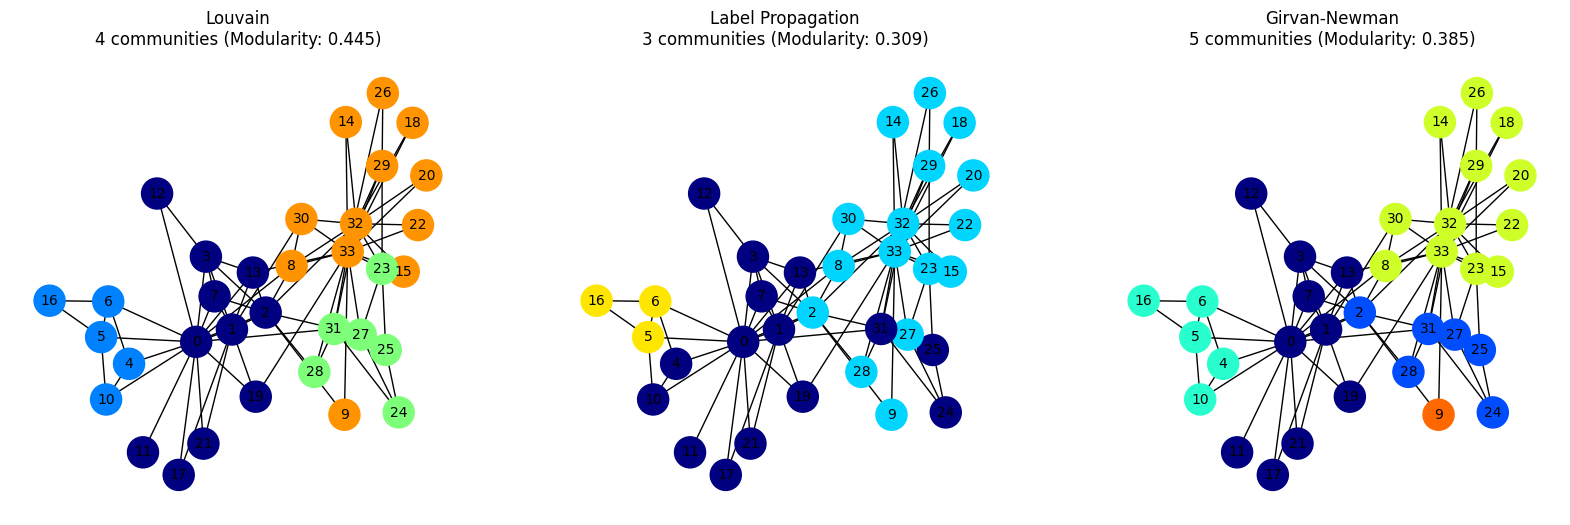

In [9]:
# Plot communities
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

visualize_communities(G, louvain_partition, "Louvain", axes[0])
visualize_communities(G, label_propagation_partition, "Label Propagation", axes[1])
visualize_communities(G, girvan_newman_partition, "Girvan-Newman", axes[2])

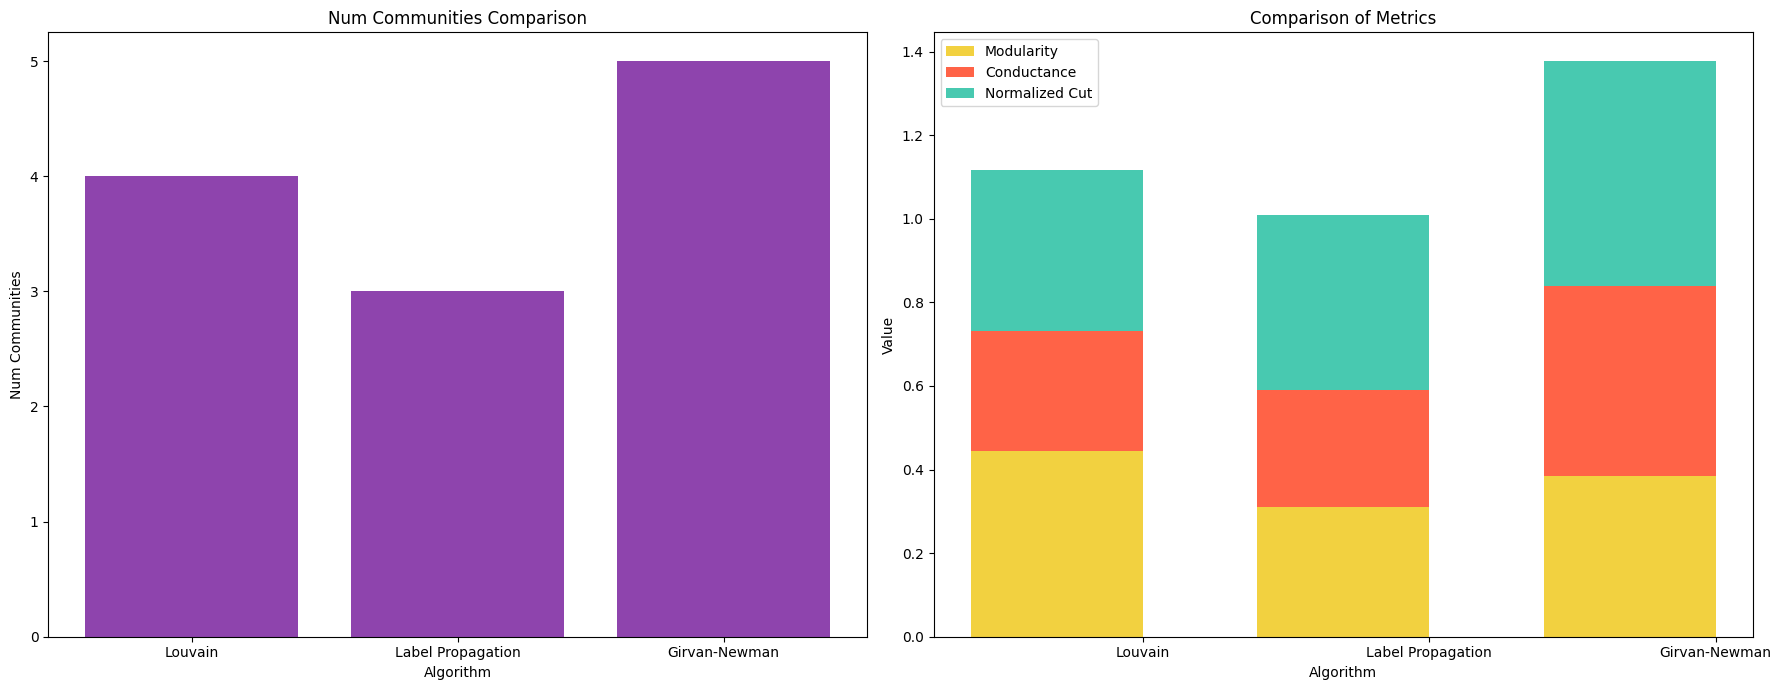

In [10]:
# Create DataFrame for metrics comparison
metrics_data = []
algorithms = ["Louvain", "Label Propagation", "Girvan-Newman"]

for partition, algorithm in zip([louvain_partition, label_propagation_partition, girvan_newman_partition], algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot the comparison of metrics
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart for comparing 'Num Communities' between algorithms
axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
axes[0].set_title("Num Communities Comparison")
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Num Communities")

# Bar chart for comparing Modularity, Conductance, and Normalized Cut for each algorithm
bar_width = 0.6  # Increase the width of the bars
x = np.arange(len(metrics_df['Algorithm']))  # X positions for each algorithm

axes[1].bar(x - bar_width/2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
axes[1].bar(x - bar_width/2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347", bottom=metrics_df['Modularity'])
axes[1].bar(x - bar_width/2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0", bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

axes[1].set_title("Comparison of Metrics")
axes[1].set_xlabel("Algorithm")
axes[1].set_ylabel("Value")
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_df['Algorithm'])
axes[1].legend()

plt.tight_layout()
plt.show()

# Viết dưới dạng class và pipeline

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

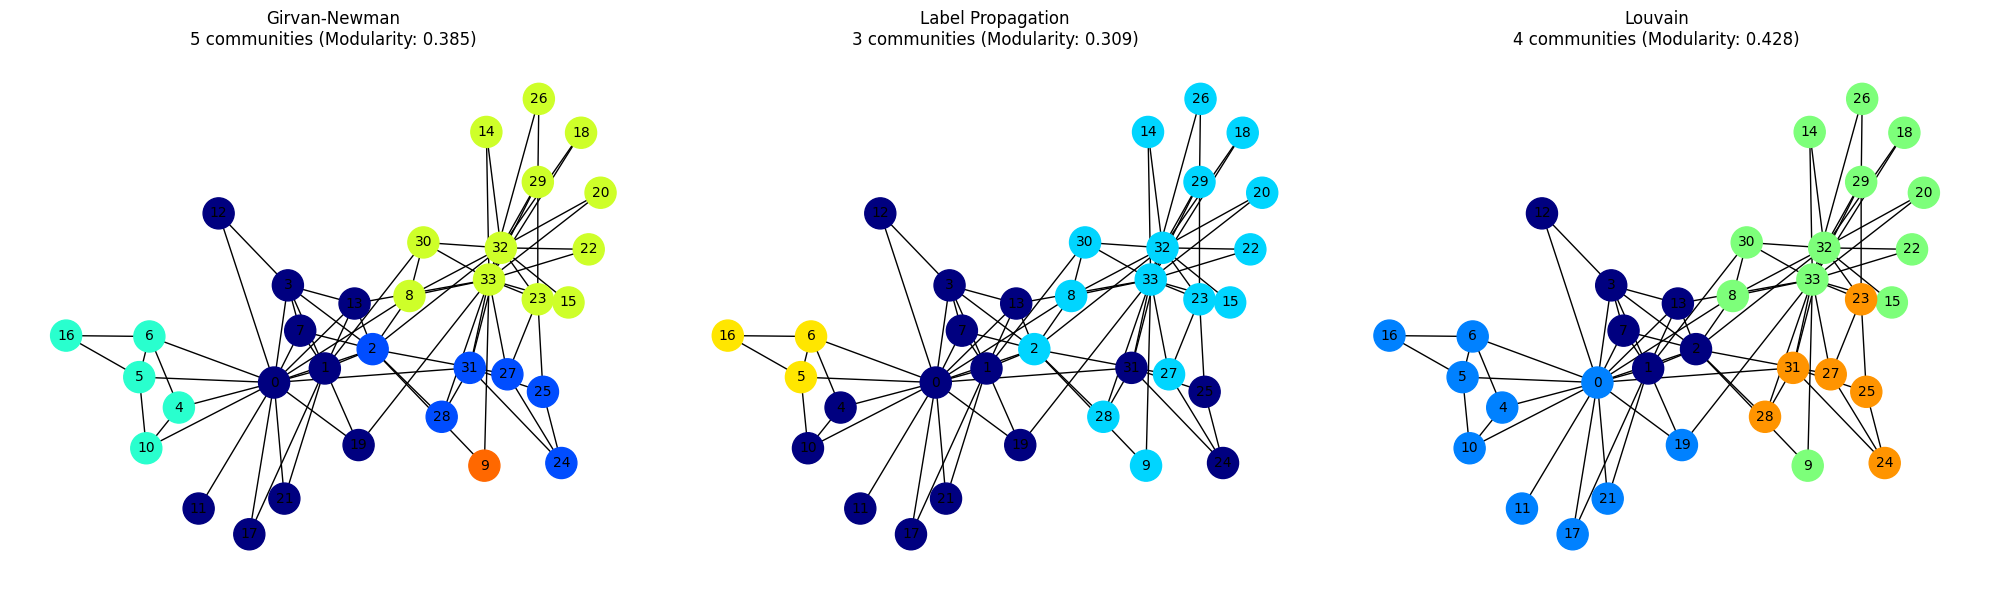

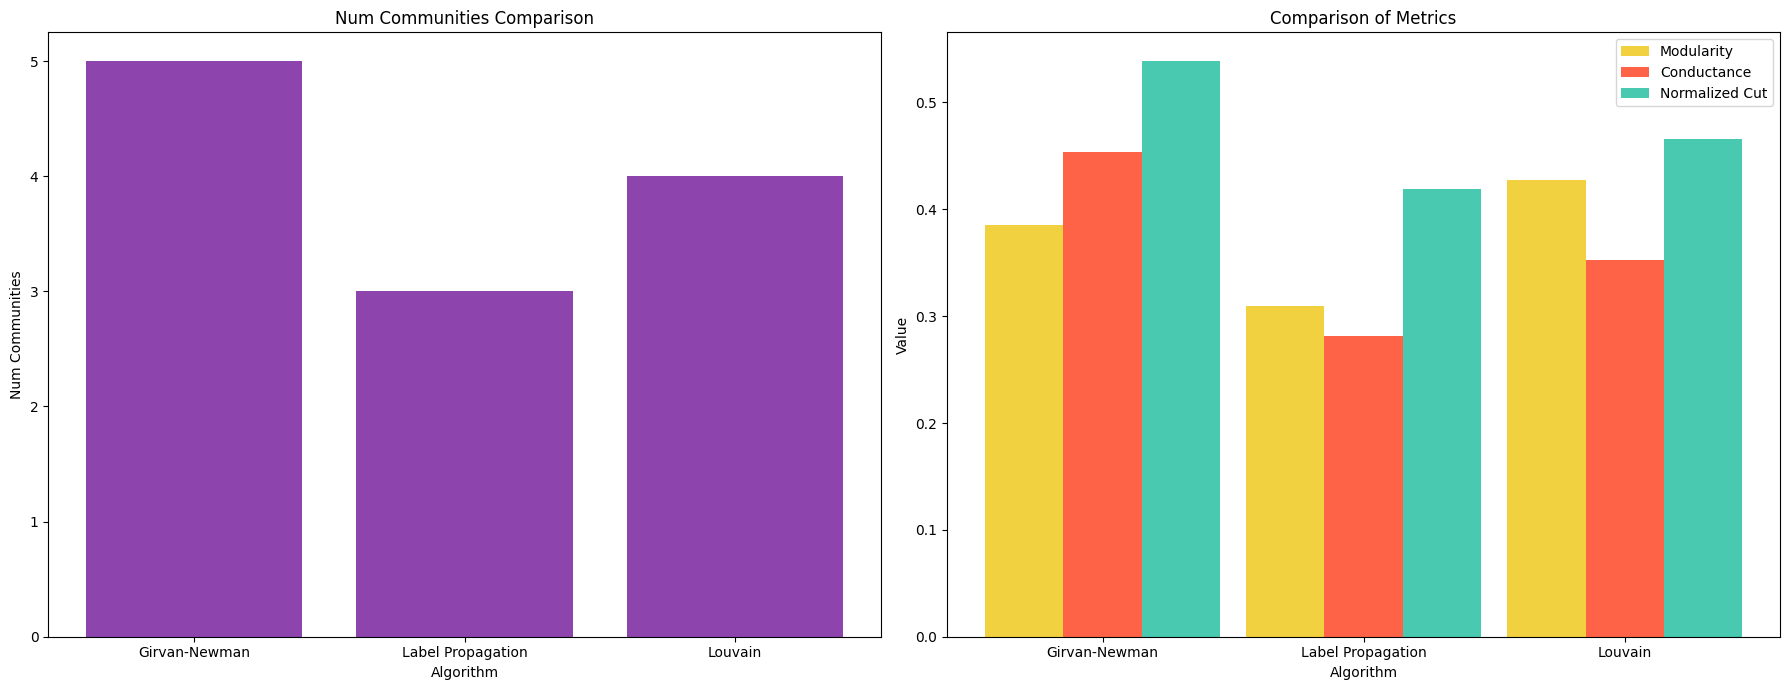

In [12]:
class CommunityDetection:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}
        self.metrics_df = None

    def detect_communities(self):
        # Girvan-Newman
        girvan_newman_generator = community.girvan_newman(self.graph)
        self.partitions['Girvan-Newman'] = max(
            girvan_newman_generator, key=lambda partition: community.modularity(self.graph, partition)
        )

        # Label Propagation
        self.partitions['Label Propagation'] = list(community.label_propagation_communities(self.graph))

        # Louvain
        self.partitions['Louvain'] = list(community.louvain_communities(self.graph))

    def calculate_metrics(self):
        def calculate_for_partition(partition):
            return {
                'Num Communities': len(partition),
                'Modularity': community.modularity(self.graph, partition),
                'Conductance': np.mean([cuts.conductance(self.graph, c) for c in partition]),
                'Normalized Cut': np.mean([cuts.normalized_cut_size(self.graph, c) for c in partition])
            }

        metrics_data = []
        for algorithm, partition in self.partitions.items():
            metrics = calculate_for_partition(partition)
            metrics['Algorithm'] = algorithm
            metrics_data.append(metrics)

        self.metrics_df = pd.DataFrame(metrics_data)

    def visualize_communities(self, ax, communities, title):
        pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=2)
        modularity = community.modularity(self.graph, communities)

        node_colors = self._create_community_node_colors(communities)
        ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
        nx.draw(
            self.graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax
        )

    def plot_results(self):
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))

        for ax, (algorithm, partition) in zip(axes, self.partitions.items()):
            self.visualize_communities(ax, partition, algorithm)

        plt.tight_layout()
        plt.show()

    def plot_metrics(self):
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        # Bar chart for comparing 'Num Communities'
        axes[0].bar(self.metrics_df['Algorithm'], self.metrics_df['Num Communities'], color="#8E44AD")
        axes[0].set_title("Num Communities Comparison")
        axes[0].set_xlabel("Algorithm")
        axes[0].set_ylabel("Num Communities")

        # Bar chart for comparing Modularity, Conductance, and Normalized Cut
        bar_width = 0.3
        x = np.arange(len(self.metrics_df['Algorithm']))
        axes[1].bar(x - bar_width, self.metrics_df['Modularity'], bar_width, label='Modularity', color="#F2D140")
        axes[1].bar(x, self.metrics_df['Conductance'], bar_width, label='Conductance', color="#FF6347")
        axes[1].bar(x + bar_width, self.metrics_df['Normalized Cut'], bar_width, label='Normalized Cut', color="#48C9B0")

        axes[1].set_title("Comparison of Metrics")
        axes[1].set_xlabel("Algorithm")
        axes[1].set_ylabel("Value")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(self.metrics_df['Algorithm'])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

    def _create_community_node_colors(self, communities):
        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break
        return node_colors


# Hàm main để chạy
def main():
    # Load đồ thị Karate
    G = nx.karate_club_graph()

    # Khởi tạo class CommunityDetection
    detector = CommunityDetection(G)

    # Phát hiện các cụm
    detector.detect_communities()

    # Tính toán chỉ số
    detector.calculate_metrics()

    # Trực quan hóa cụm
    detector.plot_results()

    # Trực quan hóa các chỉ số
    detector.plot_metrics()

# Chạy chương trình
if __name__ == "__main__":
    main()

# Class đã thành công và xâY DỰNG PIPELINE

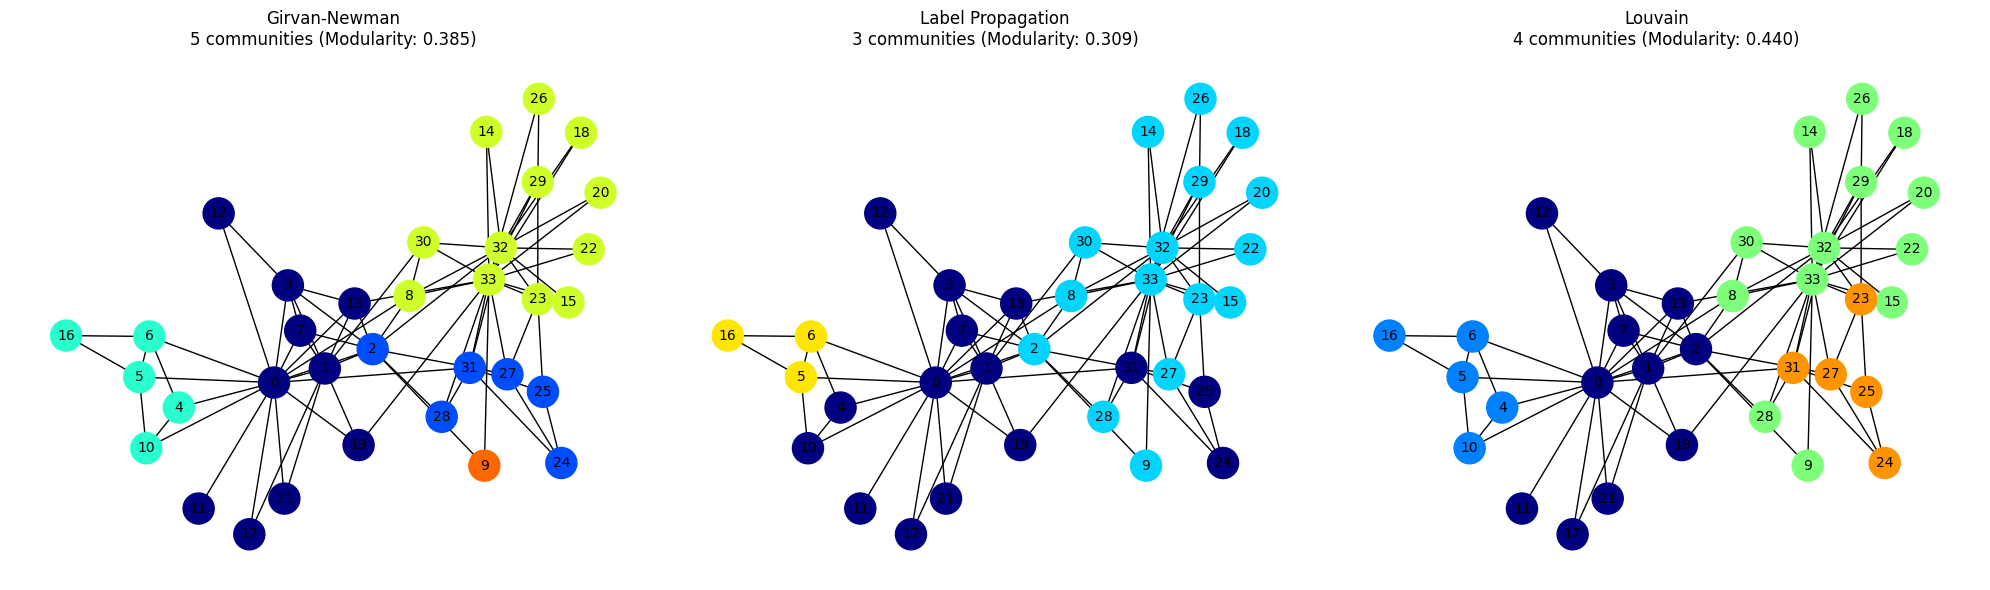

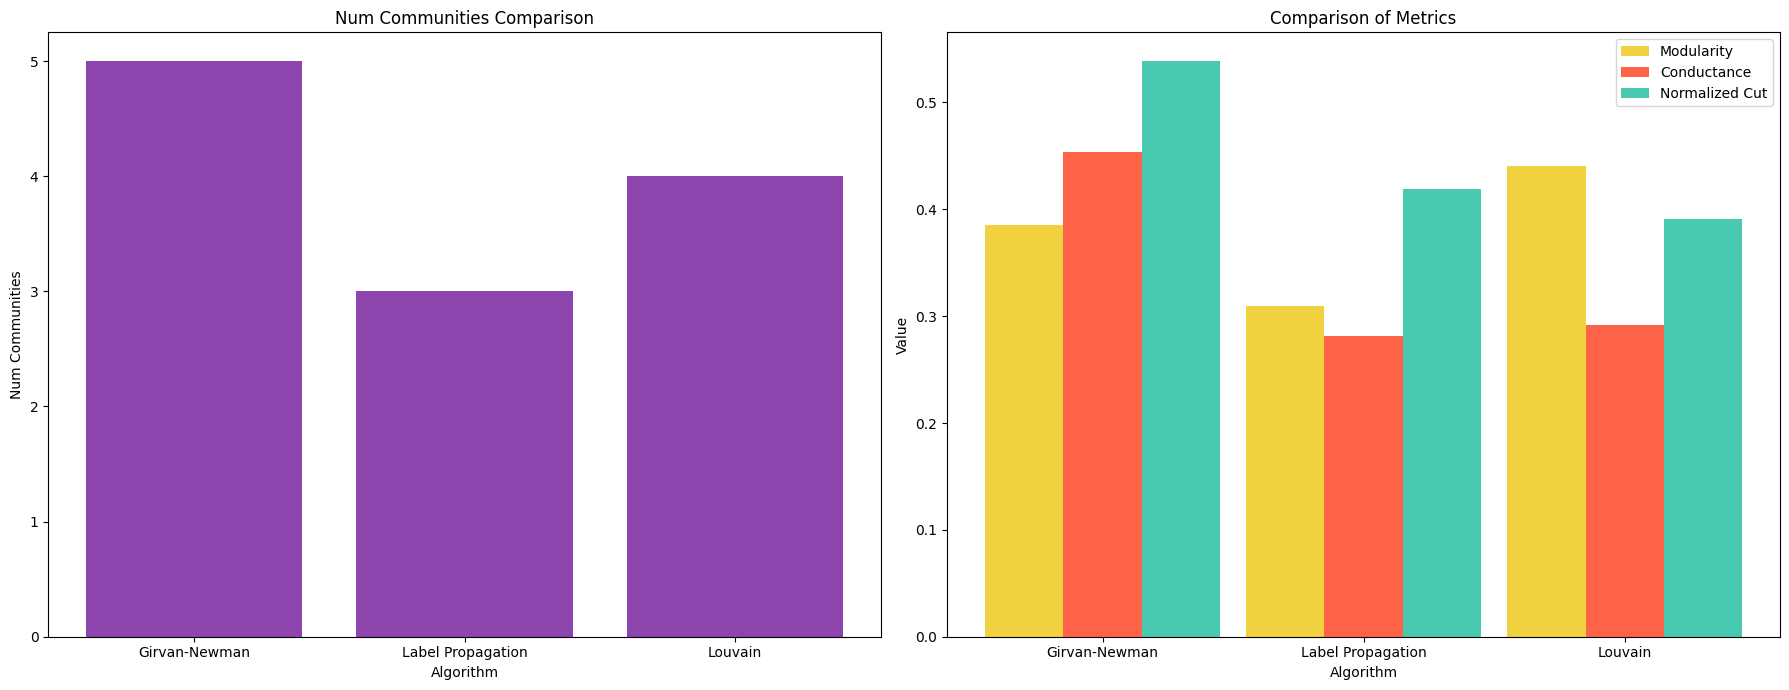

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import community
from networkx.algorithms import cuts


class CommunityDetectionPipeline:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}
        self.metrics_df = None

    def run_pipeline(self):
        """Chạy toàn bộ pipeline từ phát hiện cộng đồng, tính toán chỉ số đến trực quan hóa."""
        self.detect_communities()
        self.calculate_metrics()
        self.plot_results()
        self.plot_metrics()

    def detect_communities(self):
        """Giai đoạn phát hiện cộng đồng."""
        girvan_newman_generator = community.girvan_newman(self.graph)
        self.partitions['Girvan-Newman'] = max(
            girvan_newman_generator, key=lambda partition: community.modularity(self.graph, partition)
        )

        self.partitions['Label Propagation'] = list(community.label_propagation_communities(self.graph))
        self.partitions['Louvain'] = list(community.louvain_communities(self.graph))

    def calculate_metrics(self):
        """Giai đoạn tính toán chỉ số cho các thuật toán phát hiện cộng đồng."""
        def calculate_for_partition(partition):
            return {
                'Num Communities': len(partition),
                'Modularity': community.modularity(self.graph, partition),
                'Conductance': np.mean([cuts.conductance(self.graph, c) for c in partition]),
                'Normalized Cut': np.mean([cuts.normalized_cut_size(self.graph, c) for c in partition])
            }

        metrics_data = []
        for algorithm, partition in self.partitions.items():
            metrics = calculate_for_partition(partition)
            metrics['Algorithm'] = algorithm
            metrics_data.append(metrics)

        self.metrics_df = pd.DataFrame(metrics_data)

    def plot_results(self):
        """Giai đoạn trực quan hóa kết quả phát hiện cộng đồng."""
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        for ax, (algorithm, partition) in zip(axes, self.partitions.items()):
            self._visualize_communities(ax, partition, algorithm)
        plt.tight_layout()
        plt.show()

    def plot_metrics(self):
        """Giai đoạn trực quan hóa chỉ số so sánh giữa các thuật toán."""
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        axes[0].bar(self.metrics_df['Algorithm'], self.metrics_df['Num Communities'], color="#8E44AD")
        axes[0].set_title("Num Communities Comparison")
        axes[0].set_xlabel("Algorithm")
        axes[0].set_ylabel("Num Communities")

        bar_width = 0.3
        x = np.arange(len(self.metrics_df['Algorithm']))
        axes[1].bar(x - bar_width, self.metrics_df['Modularity'], bar_width, label='Modularity', color="#F2D140")
        axes[1].bar(x, self.metrics_df['Conductance'], bar_width, label='Conductance', color="#FF6347")
        axes[1].bar(x + bar_width, self.metrics_df['Normalized Cut'], bar_width, label='Normalized Cut', color="#48C9B0")

        axes[1].set_title("Comparison of Metrics")
        axes[1].set_xlabel("Algorithm")
        axes[1].set_ylabel("Value")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(self.metrics_df['Algorithm'])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

    def _visualize_communities(self, ax, communities, title):
        """Hàm phụ trợ để vẽ cộng đồng."""
        pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=2)
        modularity = community.modularity(self.graph, communities)
        node_colors = self._create_community_node_colors(communities)

        ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
        nx.draw(
            self.graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax
        )

    def _create_community_node_colors(self, communities):
        """Gán màu sắc cho các nút dựa trên cộng đồng."""
        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break
        return node_colors


def main():
    """Khởi chạy pipeline với đồ thị Karate Club."""
    # Load đồ thị Karate
    G = nx.karate_club_graph()

    # Tạo đối tượng pipeline và chạy
    pipeline = CommunityDetectionPipeline(G)
    pipeline.run_pipeline()


if __name__ == "__main__":
    main()


# Với ba thuật toán Girvan-Newman, label probagation và Louvain

Nhận xét

1. Louvain có chỉ số có modularity cao nhất hơn hai thuật toán Girvan-Newman và Label Propagation. Phân chia thành 4 mạng đối với Lovain, Girvan-Newman là 5 cộng đồng và cuối cùng lan truyền nhãn ở 3 cộng đồng

Modularity:

Girvan-Newman có modularity thấp hơn so với Louvain nhưng cao hơn Label Propagation.
Louvain đạt modularity cao nhất, cho thấy nó tối ưu hóa tốt hơn việc chia nhỏ các cụm để tăng tính liên kết nội bộ của cộng đồng.
Conductance:

Girvan-Newman có conductance cao nhất, điều này gợi ý rằng các cụm tạo bởi thuật toán này có nhiều cạnh cắt giữa các cụm hơn.
Louvain có conductance thấp hơn Label Propagation, chứng minh các cụm được phát hiện bởi Louvain tách biệt tốt hơn.
Normalized Cut:

Label Propagation và Louvain có normalized cut tương đối thấp, điều này phù hợp với tính chất phát hiện cộng đồng của hai thuật toán.
Girvan-Newman lại có normalized cut cao, cho thấy thuật toán này chưa tối ưu trong việc tách biệt cụm.